# Tarea 2: Tuning of SVM and MLP

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

## SVM

a) Dataset

In [ ]:
!kaggle datasets download itssuru/loan-data

Dataset URL: https://www.kaggle.com/datasets/itssuru/loan-data
License(s): DbCL-1.0
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 44.2MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile('loan-data.zip','r') as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
loan_data.csv                                  2021-05-14 19:38:52       751253


In [ ]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df_num=pd.get_dummies(df,columns=['purpose'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [ ]:
#Balance de clase
print(df_num.shape)
ncl0=len(df_num[df_num['not.fully.paid']==0])
ncl1=len(df_num[df_num['not.fully.paid']==1])
print('Clase 0 (pagado)   =',ncl0,'porcentaje = %', (ncl0/(ncl0+ncl1)*100.))
print('Clase 1 (no pagado)=',ncl1,'porcentaje = %', (ncl1/(ncl0+ncl1)*100.))

(9578, 20)
Clase 0 (pagado)   = 8045 porcentaje = % 83.99457089162664
Clase 1 (no pagado)= 1533 porcentaje = % 16.005429108373356


In [ ]:
#Divido df_num en x e y

x=df_num.drop('not.fully.paid',axis=1)
y=df_num['not.fully.paid']

b) Implementar SVC con el kernel RBF

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)


In [ ]:
#Separo los datos en entrenamiento y test
from  sklearn.model_selection import train_test_split

test_fraction=0.33

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_fraction, stratify=y,random_state=42)

print(len(x_train),len(x_test))

6417 3161


In [ ]:
from sklearn import svm

C=0.1 #regularizacion

rbf_svc=svm.SVC(kernel='rbf', gamma='auto', C=C,class_weight='balanced')

In [ ]:
rbf_svc.fit(x_train,y_train)

SVC(C=0.1, class_weight='balanced', gamma='auto')

In [ ]:
y_pred=rbf_svc.predict(x_test)

Elección de de gamma y C

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
    )

     C  accuracy    recall  precision  f1_score
0  0.1  0.660234  0.557312   0.249117  0.702455
1  0.2  0.666245  0.539526   0.249315  0.706818
2  0.3  0.669725  0.521739   0.247655  0.709084
3  0.4  0.666561  0.525692   0.246296  0.706693
4  0.5  0.670990  0.523715   0.249060  0.710141
5  0.6  0.672888  0.515810   0.248571  0.711401
6  0.7  0.677317  0.509881   0.250485  0.714694
7  0.8  0.680481  0.505929   0.251969  0.717040
8  0.9  0.678583  0.492095   0.247024  0.715090
9  1.0  0.679215  0.484190   0.245491  0.715305


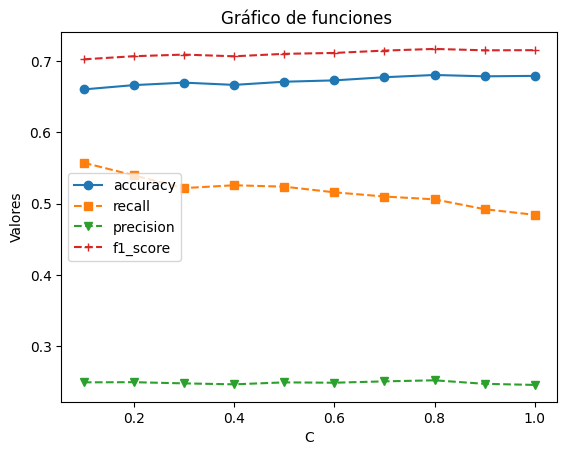

In [ ]:
accuracy_result ={}
recall_result = {}
precision_result = {}
f1_result= {}

Cc=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for x in range(len(Cc)):
  rbf_svc=svm.SVC(kernel='rbf', gamma='auto', C=Cc[x],class_weight='balanced')
  rbf_svc.fit(x_train,y_train)
  y_pred=rbf_svc.predict(x_test)
  accuracy_result[x]= accuracy_score(y_test,y_pred)
  recall_result[x]=recall_score(y_test,y_pred,pos_label=1)
  precision_result[x]=precision_score(y_test,y_pred,pos_label=1)
  f1_result[x]=f1_score(y_test,y_pred,average='weighted')

accuracy_list = [accuracy_result[n] for n in range(len(Cc))]
recall_list = [recall_result[n] for n in range(len(Cc))]
precision_list = [precision_result[n] for n in range(len(Cc))]
f1_score_list = [f1_result[n] for n in range(len(Cc))]

tabla1=pd.DataFrame({
    "C":Cc,
    "accuracy": accuracy_list,
    "recall":recall_list,
    "precision": precision_list,
    "f1_score": f1_score_list
})

print(tabla1)

plt.plot(Cc, accuracy_list, 'o-', label='accuracy')  # 'o-' para puntos y línea
plt.plot(Cc, recall_list, 's--', label='recall')  # 's--' para cuadrados y línea discontinua
plt.plot(Cc, precision_list, 'v--', label='precision')
plt.plot(Cc, f1_score_list, '+--', label='f1_score')

plt.xlabel('C')
plt.ylabel('Valores')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()

Al ir aumentando C, el recall baja pero el resto aumenta

Elijo C=0.8

Otra opción seria usar que podria elegir es C=0.3, no cambia tanto

Ahora vario gamma

   gammaa  accuracy    recall  precision  f1_score
0     0.1  0.660234  0.557312   0.249117  0.702455
1     0.2  0.666245  0.539526   0.249315  0.706818
2     0.3  0.669725  0.521739   0.247655  0.709084
3     0.4  0.666561  0.525692   0.246296  0.706693
4     0.5  0.670990  0.523715   0.249060  0.710141
5     0.6  0.672888  0.515810   0.248571  0.711401
6     0.7  0.677317  0.509881   0.250485  0.714694
7     0.8  0.680481  0.505929   0.251969  0.717040
8     0.9  0.678583  0.492095   0.247024  0.715090
9     1.0  0.679215  0.484190   0.245491  0.715305


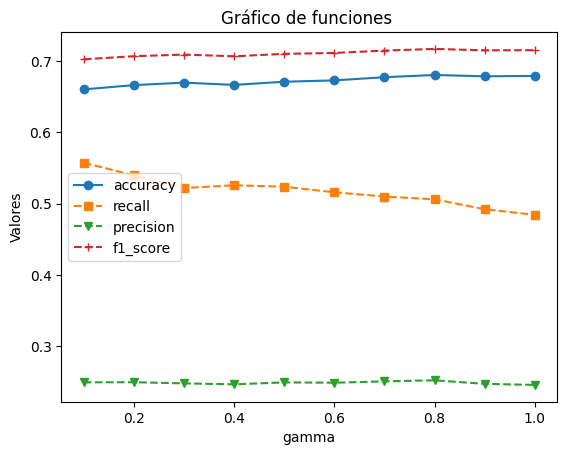

In [ ]:
C=0.8

accuracy_result2 ={}
recall_result2 = {}
precision_result2 = {}
f1_result2= {}

gammaa=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for x in range(len(gammaa)):
  rbf_svc=svm.SVC(kernel='rbf', gamma=gammaa[x], C=C,class_weight='balanced')
  rbf_svc.fit(x_train,y_train)
  y_pred=rbf_svc.predict(x_test)
  accuracy_result2[x]= accuracy_score(y_test,y_pred)
  recall_result2[x]=recall_score(y_test,y_pred,pos_label=1)
  precision_result2[x]=precision_score(y_test,y_pred,pos_label=1)
  f1_result2[x]=f1_score(y_test,y_pred,average='weighted')

accuracy_list2 = [accuracy_result[n] for n in range(len(gammaa))]
recall_list2 = [recall_result[n] for n in range(len(gammaa))]
precision_list2 = [precision_result[n] for n in range(len(gammaa))]
f1_score_list2 = [f1_result[n] for n in range(len(gammaa))]

tabla2=pd.DataFrame({
    "gammaa":gammaa,
    "accuracy": accuracy_list2,
    "recall":recall_list2,
    "precision": precision_list2,
    "f1_score": f1_score_list2
})

print(tabla2)

plt.plot(gammaa, accuracy_list2, 'o-', label='accuracy')  # 'o-' para puntos y línea
plt.plot(gammaa, recall_list2, 's--', label='recall')  # 's--' para cuadrados y línea discontinua
plt.plot(gammaa, precision_list2, 'v--', label='precision')
plt.plot(gammaa, f1_score_list2, '+--', label='f1_score')

plt.xlabel('gamma')
plt.ylabel('Valores')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()


Los valores son bastantes parecidos, pasa algo parecido que en el inciso anterior. Elijo para gamma 0.8


c) Classification report y matriz de confusión

In [ ]:
from sklearn.metrics import (ConfusionMatrixDisplay)

classification report
              precision    recall  f1-score   support

           0      0.839     0.923     0.879      2655
           1      0.154     0.073     0.099       506

    accuracy                          0.787      3161
   macro avg      0.496     0.498     0.489      3161
weighted avg      0.730     0.787     0.754      3161



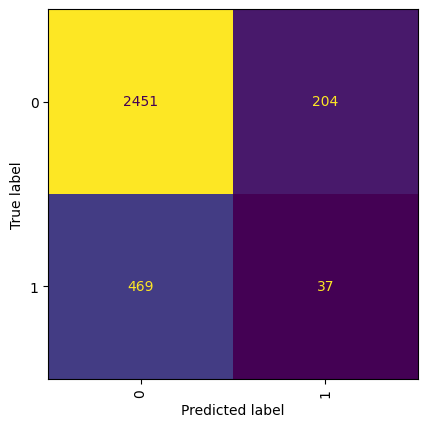

In [ ]:
rbf_svc=svm.SVC(kernel='rbf', gamma=0.8, C=0.8,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label=1)
precision=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')

print('classification report')
print(classification_report(y_test,y_pred,digits=3))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        colorbar=False,
                                        xticks_rotation='vertical')
plt.show()

Para gamma=0.8 el recall da bastante bajo para la clase 1 pero alto para la clase 0.

classification report
              precision    recall  f1-score   support

           0      0.856     0.806     0.830      2655
           1      0.221     0.289     0.250       506

    accuracy                          0.723      3161
   macro avg      0.538     0.547     0.540      3161
weighted avg      0.754     0.723     0.737      3161



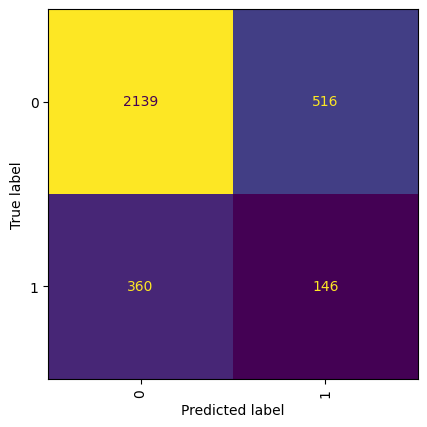

In [ ]:
rbf_svc=svm.SVC(kernel='rbf', gamma=0.3, C=0.8,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label=1)
precision=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')

print('classification report')
print(classification_report(y_test,y_pred,digits=3))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        colorbar=False,
                                        xticks_rotation='vertical')
plt.show()

Para gamma=0.3, el recall da mejor para la clase 1 y disminuye para la clase 0.

Priorizando el recall para la clase 1 como en el ejercicio anterior, me quero con C=0.8 y gamma=0.3

d) Rebalanceo del set de entrenamiento, reservando solo 1000 ejemplos de la clase mayoritaria.

Utilizo 4 atributos: ‘credit.policy’, ‘int.rate’, ‘fico’, ‘inq.last.6mths’ y  retuneo los parametros C y gamma

In [ ]:
# Assuming x0 is your numpy array
df_num = pd.DataFrame(df_num, columns=['credit.policy', 'int.rate', 'fico','inq.last.6mths','not.fully.paid'])  # Convert x0 to DataFrame
df_num.head() # Now you can call head() on the DataFram

,credit.policy,int.rate,fico,inq.last.6mths,not.fully.paid
0,1,0.1189,737,0,0
1,1,0.1071,707,0,0
2,1,0.1357,682,1,0
3,1,0.1008,712,1,0
4,1,0.1426,667,0,0


Balance de clases

In [ ]:
df_0=df_num[df_num['not.fully.paid']==0]
df_1=df_num[df_num['not.fully.paid']==1]
df_0=df_0.sample(n=1500,random_state=42)


dfb=pd.concat([df_0,df_1],axis=0)
dfb.shape

(3033, 5)

In [ ]:
#Nota, tengo que rebalancear despues de split (no rebalanceo test)
ncl0=len(dfb[dfb['not.fully.paid']==0])
ncl1=len(dfb[dfb['not.fully.paid']==1])
print('Clase 0 (pagado)   =',ncl0,'porcentaje = %', (ncl0/(ncl0+ncl1)*100.))
print('Clase 1 (no pagado)=',ncl1,'porcentaje = %', (ncl1/(ncl0+ncl1)*100.))


Clase 0 (pagado)   = 1500 porcentaje = % 49.45598417408507
Clase 1 (no pagado)= 1533 porcentaje = % 50.54401582591493


In [ ]:
xb=dfb.drop('not.fully.paid',axis=1)
yb=dfb['not.fully.paid']

scaler=StandardScaler()
xb=scaler.fit_transform(xb)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=test_fraction, stratify=yb,random_state=42)

          C  accuracy    recall  precision  f1_score
0       0.1  0.623377  0.660079   0.619666  0.622830
1       0.2  0.621379  0.624506   0.625743  0.621382
2       0.3  0.626374  0.610672   0.635802  0.626307
3       0.4  0.625375  0.592885   0.639659  0.625015
4       0.5  0.624376  0.588933   0.639485  0.623940
5       0.6  0.626374  0.590909   0.641631  0.625941
6       0.7  0.628372  0.590909   0.644397  0.627888
7       0.8  0.625375  0.592885   0.639659  0.625015
8       0.9  0.626374  0.592885   0.641026  0.625991
9       1.0  0.624376  0.588933   0.639485  0.623940
10      5.0  0.626374  0.565217   0.650000  0.625016
11     10.0  0.627373  0.545455   0.658711  0.624899
12     50.0  0.613387  0.501976   0.652956  0.608547
13    100.0  0.609391  0.505929   0.644836  0.605186
14    500.0  0.589411  0.545455   0.603939  0.588646
15   1000.0  0.576424  0.531621   0.589912  0.575598
16   5000.0  0.556444  0.531621   0.565126  0.556191
17  10000.0  0.555445  0.521739   0.565310  0.

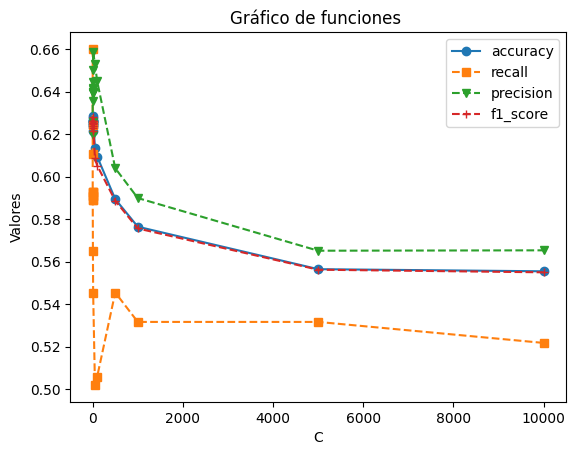

In [ ]:
accuracy_result ={}
recall_result = {}
precision_result = {}
f1_result= {}

Cc=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10,50,100,500,1000,5000,10000]

for x in range(len(Cc)):
  rbf_svc=svm.SVC(kernel='rbf', gamma='auto', C=Cc[x],class_weight='balanced')
  rbf_svc.fit(x_train,y_train)
  y_pred=rbf_svc.predict(x_test)
  accuracy_result[x]= accuracy_score(y_test,y_pred)
  recall_result[x]=recall_score(y_test,y_pred,pos_label=1)
  precision_result[x]=precision_score(y_test,y_pred,pos_label=1)
  f1_result[x]=f1_score(y_test,y_pred,average='weighted')

accuracy_list = [accuracy_result[n] for n in range(len(Cc))]
recall_list = [recall_result[n] for n in range(len(Cc))]
precision_list = [precision_result[n] for n in range(len(Cc))]
f1_score_list = [f1_result[n] for n in range(len(Cc))]

tabla1=pd.DataFrame({
    "C":Cc,
    "accuracy": accuracy_list,
    "recall":recall_list,
    "precision": precision_list,
    "f1_score": f1_score_list
})

print(tabla1)

plt.plot(Cc, accuracy_list, 'o-', label='accuracy')  # 'o-' para puntos y línea
plt.plot(Cc, recall_list, 's--', label='recall')  # 's--' para cuadrados y línea discontinua
plt.plot(Cc, precision_list, 'v--', label='precision')
plt.plot(Cc, f1_score_list, '+--', label='f1_score')

plt.xlabel('C')
plt.ylabel('Valores')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()

   gammaa  accuracy    recall  precision  f1_score
0     0.1  0.623377  0.660079   0.619666  0.622830
1     0.2  0.621379  0.624506   0.625743  0.621382
2     0.3  0.626374  0.610672   0.635802  0.626307
3     0.4  0.625375  0.592885   0.639659  0.625015
4     0.5  0.624376  0.588933   0.639485  0.623940
5     0.6  0.626374  0.590909   0.641631  0.625941
6     0.7  0.628372  0.590909   0.644397  0.627888
7     0.8  0.625375  0.592885   0.639659  0.625015
8     0.9  0.626374  0.592885   0.641026  0.625991
9     1.0  0.624376  0.588933   0.639485  0.623940


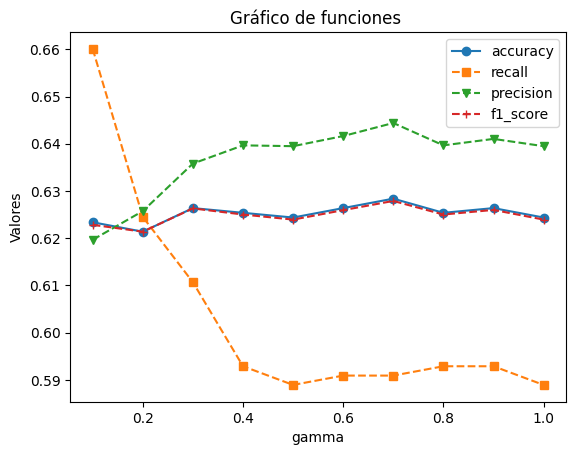

In [ ]:
C=0.1

accuracy_result2 ={}
recall_result2 = {}
precision_result2 = {}
f1_result2= {}

gammaa=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for x in range(len(gammaa)):
  rbf_svc=svm.SVC(kernel='rbf', gamma=gammaa[x], C=C,class_weight='balanced')
  rbf_svc.fit(x_train,y_train)
  y_pred=rbf_svc.predict(x_test)
  accuracy_result2[x]= accuracy_score(y_test,y_pred)
  recall_result2[x]=recall_score(y_test,y_pred,pos_label=1)
  precision_result2[x]=precision_score(y_test,y_pred,pos_label=1)
  f1_result2[x]=f1_score(y_test,y_pred,average='weighted')

accuracy_list2 = [accuracy_result[n] for n in range(len(gammaa))]
recall_list2 = [recall_result[n] for n in range(len(gammaa))]
precision_list2 = [precision_result[n] for n in range(len(gammaa))]
f1_score_list2 = [f1_result[n] for n in range(len(gammaa))]

tabla2=pd.DataFrame({
    "gammaa":gammaa,
    "accuracy": accuracy_list2,
    "recall":recall_list2,
    "precision": precision_list2,
    "f1_score": f1_score_list2
})

print(tabla2)

plt.plot(gammaa, accuracy_list2, 'o-', label='accuracy')  # 'o-' para puntos y línea
plt.plot(gammaa, recall_list2, 's--', label='recall')  # 's--' para cuadrados y línea discontinua
plt.plot(gammaa, precision_list2, 'v--', label='precision')
plt.plot(gammaa, f1_score_list2, '+--', label='f1_score')

plt.xlabel('gamma')
plt.ylabel('Valores')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()


Una opcion es C=0.1 y gamma=0.1 para maximizar el recall



---



In [ ]:
accuracy_result ={}
recall_result = {}
precision_result = {}
f1_result= {}

Cc=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10,50,100,500,1000,5000,10000]
gammaa=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10,100,500,1000,5000,10000]

for n in range(len(Cc)):
  for m in range(len(gammaa)):
    rbf_svc=svm.SVC(kernel='rbf', gamma=gammaa[m], C=Cc[n],class_weight='balanced')
    rbf_svc.fit(x_train,y_train)
    y_pred=rbf_svc.predict(x_test)
    accuracy_result[n,m]= accuracy_score(y_test,y_pred)
    recall_result[n,m]=recall_score(y_test,y_pred,pos_label=1)
    precision_result[n,m]=precision_score(y_test,y_pred,pos_label=1)
    f1_result[n,m]=f1_score(y_test,y_pred,average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

In [ ]:
accuracy_list = [accuracy_result[n,m] for n in range(len(Cc)) for m in range(len(gammaa))]
recall_list = [recall_result[n,m] for n in range(len(Cc)) for m in range(len(gammaa))]
precision_list = [precision_result[n,m] for n in range(len(Cc)) for m in range(len(gammaa))]
f1_score_list = [f1_result[n,m] for n in range(len(Cc)) for m in range(len(gammaa))]


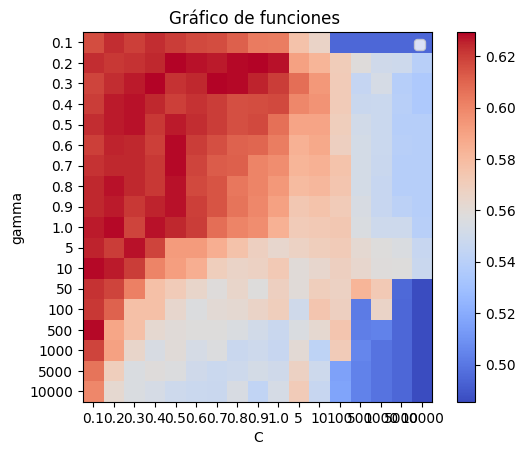

In [ ]:
accuracy_array = np.array(accuracy_list).reshape(len(Cc), len(gammaa))

# Crear gráfico de calor
plt.imshow(accuracy_array, cmap='coolwarm')
plt.colorbar()  # Añadir barra de color

plt.xticks(range(len(gammaa)), gammaa)
plt.yticks(range(len(Cc)), Cc)

plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()

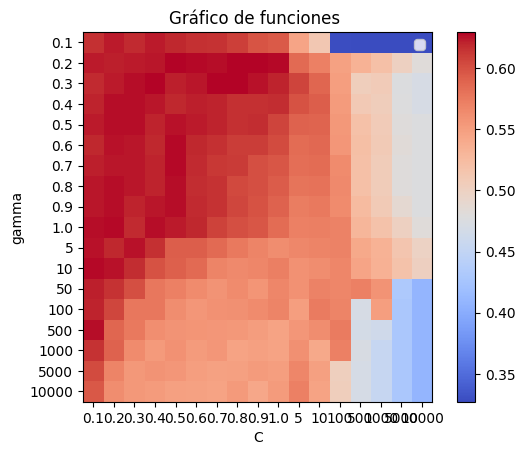

In [ ]:
f1_score_array = np.array(f1_score_list).reshape(len(Cc), len(gammaa))

# Crear gráfico de calor
plt.imshow(f1_score_array, cmap='coolwarm')
plt.colorbar()  # Añadir barra de color

plt.xticks(range(len(gammaa)), gammaa)
plt.yticks(range(len(Cc)), Cc)

plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()

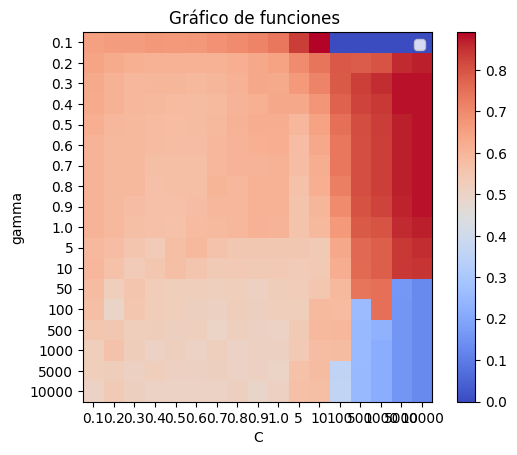

In [ ]:
recall_array = np.array(recall_list).reshape(len(Cc), len(gammaa))

# Crear gráfico de calor
plt.imshow(recall_array, cmap='coolwarm')
plt.colorbar()  # Añadir barra de color

plt.xticks(range(len(gammaa)), gammaa)
plt.yticks(range(len(Cc)), Cc)

plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Gráfico de funciones ')

plt.legend()
plt.show()

classification report
              precision    recall  f1-score   support

           0      0.620     0.580     0.599       495
           1      0.613     0.652     0.632       506

    accuracy                          0.616      1001
   macro avg      0.617     0.616     0.616      1001
weighted avg      0.617     0.616     0.616      1001



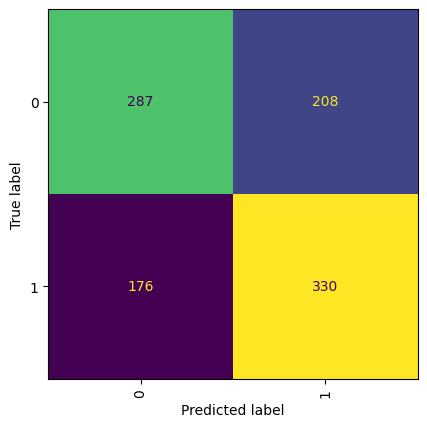

In [ ]:
rbf_svc=svm.SVC(kernel='rbf', gamma=0.1, C=0.1,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label=1)
precision=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')

print('classification report')
print(classification_report(y_test,y_pred,digits=3))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        colorbar=False,
                                        xticks_rotation='vertical')
plt.show()

Otra opcion es C=0.7 y gamma=0.1 para maximizar el recall

classification report
              precision    recall  f1-score   support

           0      0.613     0.640     0.626       495
           1      0.632     0.605     0.618       506

    accuracy                          0.622      1001
   macro avg      0.623     0.623     0.622      1001
weighted avg      0.623     0.622     0.622      1001



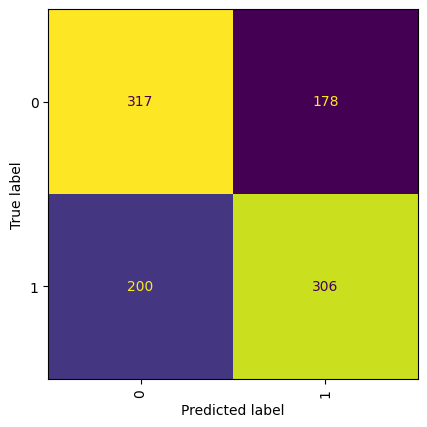

In [ ]:
rbf_svc=svm.SVC(kernel='rbf', gamma=0.1, C=0.7,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label=1)
precision=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')

print('classification report')
print(classification_report(y_test,y_pred,digits=3))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        colorbar=False,
                                        xticks_rotation='vertical')
plt.show()



---


## MLP

In [ ]:
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings

f) ) Entreno una red de perceptrones con una capa oculta con distintos tamaños en el arreglos usando adam y el train set con las clases balanceadas construıdo en el item (d).

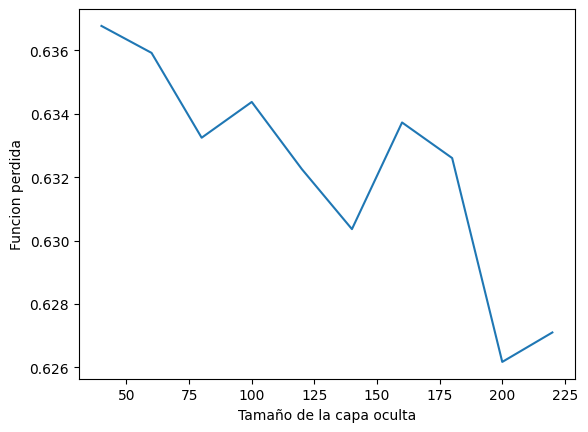

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=test_fraction, stratify=yb,random_state=42)

#Tamaño de la capa oculta
n_tam=[40,60,80,100,120,140,160,180,200,220]

bloss=[]
for hls in n_tam:
  mlp=MLPClassifier(hidden_layer_sizes=hls,
                    solver='adam', tol=0.0001,
                    max_iter=5000,random_state=42)
  mlp.fit(x_train,y_train)
  bloss=np.append(bloss,mlp.best_loss_)

plt.xlabel('Tamaño de la capa oculta')
plt.ylabel('Funcion perdida')
plt.plot(n_tam,bloss)
plt.show()

La mejor performance se obtiene usando una para oculta de 200 neuronas

g) Entreno una red de perceptrones con dos capas ocultas, la primera con el tamaño que mejor performance obtuvo en el ıtem anterior (200) y para la segunda capa vario el numero de

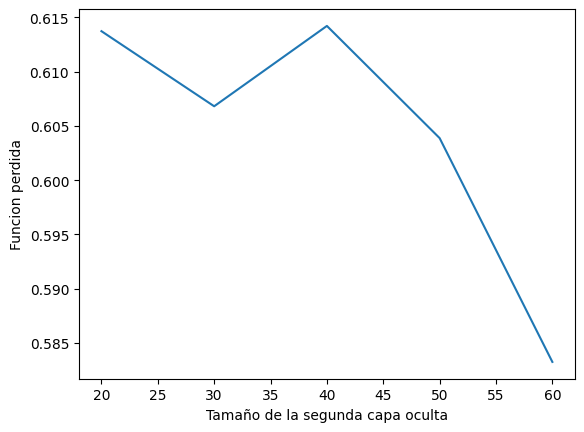

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=test_fraction, stratify=yb,random_state=42)

#Tamaño de la capa oculta
n2_tam=[20,30,40,50,60]

bloss2=[]
for hls in n2_tam:
  mlp=MLPClassifier(hidden_layer_sizes=(200,hls),
                    solver='adam', tol=0.0001,
                    max_iter=5000,random_state=42)
  mlp.fit(x_train,y_train)
  bloss2=np.append(bloss2,mlp.best_loss_)

plt.xlabel('Tamaño de la segunda capa oculta')
plt.ylabel('Funcion perdida')
plt.plot(n2_tam,bloss2)
plt.show()

La mejor performance se obtiene usando para la segunda capa 60 neuronas

h) Imprimo la curva best loss , el classification report y la matriz de confusión para el mejor modelo.

loss =  [0.61372374 0.60680926 0.61420811 0.60387629 0.58326549 0.58326549]

classification report
              precision    recall  f1-score   support

           0      0.558     0.533     0.545       495
           1      0.562     0.587     0.574       506

    accuracy                          0.560      1001
   macro avg      0.560     0.560     0.560      1001
weighted avg      0.560     0.560     0.560      1001



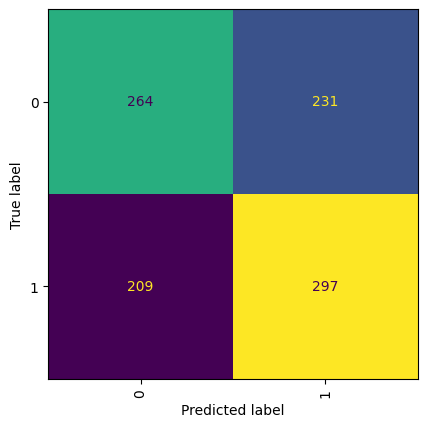

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(200,60),
                    solver='adam', tol=0.0001,
                    max_iter=5000,random_state=42)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)

bloss2=np.append(bloss2,mlp.best_loss_)

print('loss = ',bloss2)

accuracy= accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label=1)
precision=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')

print('')
print('classification report')
print(classification_report(y_test,y_pred,digits=3))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        colorbar=False,
                                        xticks_rotation='vertical')
plt.show()

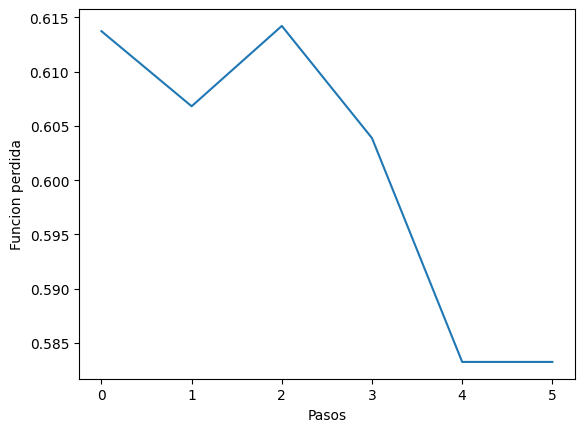

In [ ]:
plt.xlabel('Pasos')
plt.ylabel('Funcion perdida')
plt.plot(range(len(bloss2)),bloss2)
plt.show()

i) Comparar los metodos

In [ ]:
ben={}
cost={}
gran={}
roi_list={}

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Defino las funciones
def beneficio(tp):
  b=0.3
  return tp*b

def costo(fp,fn):
  cf=0.8
  cn=0.3
  y=fp*cf+fn*cn
  return y

def granted(tp,fp):
  y=tp+fp
  return y

# Definir ROI
def roi(tb,tc,lg):
  y=(tb-tc)/lg
  return y


In [ ]:
#Random
#y_ran={}
y_ran = np.zeros(len(y), dtype=int)

for n in range(0,len(y)):
  dc=np.random.random()
  if dc < 0.5:
    y_ran[n]=0
  else:
    y_ran[n]=1

#tn,fp,fn,tp=confusion_matrix(y,y_ran)

# Assuming binary classification, get confusion matrix elements
# The confusion matrix might be [[tn, fp], [fn, tp]]
# or it might just be a single number if it is a perfect predictor
conf_matrix = confusion_matrix(y, y_ran)

# Handle different shapes of confusion matrix
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()  # Unpack if 2x2 matrix
elif conf_matrix.shape == (1, 1) or conf_matrix.shape == ():
    #If there are only True Negatives
    tn = conf_matrix.item()
    fp = 0
    fn = 0
    tp = 0
else:
    raise ValueError("Unexpected shape of confusion matrix")

ben[1]=beneficio(tp)
cost[1]=costo(fp,fn)
gran[1]=granted(tp,fp)
roi_list[1]=roi(ben[1],cost[1],gran[1])

print(ben[1],cost[1])


230.1 3460.2000000000003


In [ ]:
#Mayority (se entregan a todos)
#y_may={}
y_may = np.zeros(len(y), dtype=int)

for n in range(1,len(y)):
  y_may[n]=1


#tn,fp,fn,tp=confusion_matrix(y,y_may)

conf_matrix = confusion_matrix(y, y_may)
tn, fp, fn, tp = conf_matrix.ravel()

ben[2]=beneficio(tp)
cost[2]=costo(fp,fn)
gran[2]=granted(tp,fp)
roi_list[2]=roi(ben[2],cost[2],gran[2])


print(ben[2],cost[2])

459.9 6435.200000000001


In [ ]:
#SVM parte 1

x=df_num.drop('not.fully.paid',axis=1)
y=df_num['not.fully.paid']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_fraction, stratify=y,random_state=42)


rbf_svc=svm.SVC(kernel='rbf', gamma=0.3, C=0.8,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)

#tn,fp,fn,tp=confusion_matrix(y,y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

ben[3]=beneficio(tp)
cost[3]=costo(fp,fn)
gran[3]=granted(tp,fp)
roi_list[3]=roi(ben[3],cost[3],gran[3])

print(ben[3],cost[3])

78.89999999999999 836.1


In [ ]:
#SVM version 2

x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=test_fraction, stratify=yb,random_state=42)

rbf_svc=svm.SVC(kernel='rbf', gamma=0.1, C=0.7,class_weight='balanced')
rbf_svc.fit(x_train,y_train)
y_pred=rbf_svc.predict(x_test)

#tn,fp,fn,tp=confusion_matrix(y,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()


ben[4]=beneficio(tp)
cost[4]=costo(fp,fn)
gran[4]=granted(tp,fp)
roi_list[4]=roi(ben[4],cost[4],gran[4])

print(ben[4],cost[4])


91.8 202.4


In [ ]:
#MLP
mlp=MLPClassifier(hidden_layer_sizes=(200,60),
                    solver='adam', tol=0.0001,
                    max_iter=5000,random_state=42)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)

#tn,fp,fn,tp=confusion_matrix(y,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

ben[5]=beneficio(tp)
cost[5]=costo(fp,fn)
gran[5]=granted(tp,fp)
roi_list[5]=roi(ben[5],cost[5],gran[5])

print(ben[5],cost[5])

89.1 247.5


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#tn,fp,fn,tp=confusion_matrix(y,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

ben[6]=beneficio(tp)
cost[6]=costo(fp,fn)
gran[6]=granted(tp,fp)
roi_list[6]=roi(ben[6],cost[6],gran[6])

print(ben[6],cost[6])

78.3 189.5


In [ ]:
be = [ben[n] for n in range(1,7)]
co= [cost[n] for n in range(1,7)]
gr= [gran[n] for n in range(1,7)]
ro= [roi_list[n] for n in range(1,7)]

tabla_comp=pd.DataFrame({
    "metodo": ['random','mayority','svm1','svm2','mlp','naive bayes'],
    "beneficio": be,
    "costo": co,
    "granted": gr,
    "roi": ro
})

print(tabla_comp)

        metodo  beneficio   costo  granted       roi
0       random      230.1  3460.2     4805 -0.672237
1     mayority      459.9  6435.2     9577 -0.623922
2         svm1       78.9   836.1     1217 -0.622186
3         svm2       91.8   202.4      484 -0.228512
4          mlp       89.1   247.5      528 -0.300000
5  naive bayes       78.3   189.5      406 -0.273892




*   random: El beneficio obtenido es mayor pero tambien es mayor el costo, se termina perdiendo
*   mayority: no se obtiene beneficio y el costo es el mas alto, se termina perdiendo
*   svm1: se pierde
*   svm2: se pierde
*   mlp: se pierde
*   naive bayer: se pierde



j) Los modelos ayudan a aumentar la ganancia pero se sigue perdiendo

Se podria mejorar con mas datos o modelos mas sofisticados.